In [13]:
#basic package
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import time
import datetime as dt
import itertools
import re
import math
import pickle #to download MLP vectors
from scipy.stats import percentileofscore
import random
from scipy.stats import pearsonr, spearmanr
from scipy.stats import skew, kurtosis
from scipy import stats

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
from UTILS import nbrh_WG_open, mid_cum_Z4_sec, starting_h_day, FB_process
import config_exp2 as config

In [15]:
path_extracted_data = config.path_extracted_data

# download data

In [16]:
#VTDperhour PropZ5 zonecrossed2transition unevenness
rs = str(0)
model_name = '_KBF_trend_rs0FinalciBHV_'
path_save_all = os.path.join(path_extracted_data,'LongformatModels')
path_2save = os.path.join(path_save_all,'Residuals')
#create a director if not existing
if not os.path.exists(path_2save):
    os.makedirs(path_2save)

In [17]:
#initial data
df_init = pd.read_csv(os.path.join(path_extracted_data,'df_longformatALL.csv'),sep=',')
print(df_init.shape)
display(df_init.head(3))

(2228, 26)


,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ4,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight
0,created,EXP3_hen_93,pen4,1,0.00,148,0,Exp3,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HA2B,EXP3_hen_93,pen4,1,0.95,177,0,Exp3,0,1,...,0.077633,0.174229,0.067145,0.214326,2.270833,1.056667,0.970769,0.0,0.0,NaN
2,HA3B,EXP3_hen_93,pen4,1,1.64,198,0,Exp3,0,1,...,0.076175,0.323953,0.100821,0.131769,2.437500,1.040000,0.846872,19.0,1.0,NaN


In [18]:
#VTD
df_init_ = df_init[df_init['HAID']!='created'].copy()
print(df_init_.shape)
df_init_['VTDperhour_SC'] = stats.zscore(df_init_['VTDperhour'])
display(df_init_['VTDperhour_SC'].describe())
df_init_[(df_init_['VTDperhour_SC']<-0.165)&(df_init_['VTDperhour_SC']>-0.175)]#['VTDperhour']

(1875, 26)


count    1.875000e+03
mean    -1.591616e-16
std      1.000267e+00
min     -2.127471e+00
25%     -6.608170e-01
50%     -4.001105e-02
75%      5.801614e-01
max      6.607269e+00
Name: VTDperhour_SC, dtype: float64

,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight,VTDperhour_SC
77,HA2B,EXP3_hen_82,pen4,8,0.95,177,0,Exp3,0,1,...,0.397178,0.465013,0.109460,3.541667,1.000000,0.697354,0.0,0.0,NaN,-0.171932
278,HA10A,EXP3_hen_41,pen5,28,8.28,400,0,Exp3,0,1,...,0.197434,0.152147,0.095245,3.541667,1.061667,0.795353,82.0,1.0,NaN,-0.171932
584,HA7B,EXP3_hen_102,pen6,56,5.82,325,0,Exp3,0,1,...,0.588317,0.235400,0.064880,3.552083,1.010000,0.993603,28.0,0.0,NaN,-0.166112
898,HA5,EXP1_hen_149,pen12,108,8.88,418,0,Exp1,0,0,...,0.407059,0.433333,0.012404,3.544444,1.033781,0.618650,46.0,0.0,1716.5,-0.170380
1245,HA1,EXP1_hen_32,pen5,177,0.82,173,1,Exp1,0,0,...,0.325796,0.607071,0.000000,3.542857,1.003040,0.714899,2.0,0.0,1872.6,-0.171267
1276,HA5,EXP1_hen_85,pen5,182,8.88,418,1,Exp1,0,0,...,0.259302,0.665691,0.012639,3.544444,1.000000,0.641476,18.0,0.0,1969.6,-0.170380


In [20]:
v = 0.17*2
e = 0.002
df_init_[(df_init_['VTDperhour_SC']>v-e)&(df_init_['VTDperhour_SC']<v+e)]#['VTDperhour']

,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight,VTDperhour_SC
65,HA1B,EXP3_hen_83,pen4,7,0.26,156,0,Exp3,0,1,...,0.459818,0.409596,0.000081,4.458333,1.026667,0.770696,0.0,0.0,NaN,0.340233
1501,HA4,EXP2_hen_143,pen5,224,7.99,391,0,Exp2,1,0,...,0.275099,0.544062,0.040550,4.459184,NaN,0.437009,9.0,0.0,1756.5,0.340708
1895,HA4,EXP2_hen_73,pen3,304,7.99,391,0,Exp2,0,0,...,0.278713,0.595496,0.038764,4.459184,NaN,0.557952,10.0,1.0,2012.3,0.340708


In [21]:
v = 0.17
e = 0.002
df_init_[(df_init_['VTDperhour_SC']>v-e)&(df_init_['VTDperhour_SC']<v+e)]#['VTDperhour']

,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight,VTDperhour_SC
565,HA11B,EXP3_hen_98,pen4,54,9.50,437,0,Exp3,0,1,...,0.288884,0.443416,0.221175,4.15625,1.006667,0.671495,88.0,1.0,NaN,0.171451
593,HA7B,EXP3_hen_103,pen6,57,5.82,325,0,Exp3,0,1,...,0.206764,0.353802,0.273625,4.15625,1.048333,0.605660,52.0,0.0,NaN,0.171451


In [22]:
4.15625-4.459184

-0.3029339999999996

In [23]:
3.846939-4.15625

-0.3093110000000001

In [24]:
3.846939-3.544444

0.30249499999999996

In [25]:
v = -0.17
e = 0.002
df_init_[(df_init_['VTDperhour_SC']<v+e)&(df_init_['VTDperhour_SC']>v-e)]#['VTDperhour']

,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight,VTDperhour_SC
77,HA2B,EXP3_hen_82,pen4,8,0.95,177,0,Exp3,0,1,...,0.397178,0.465013,0.109460,3.541667,1.000000,0.697354,0.0,0.0,NaN,-0.171932
278,HA10A,EXP3_hen_41,pen5,28,8.28,400,0,Exp3,0,1,...,0.197434,0.152147,0.095245,3.541667,1.061667,0.795353,82.0,1.0,NaN,-0.171932
898,HA5,EXP1_hen_149,pen12,108,8.88,418,0,Exp1,0,0,...,0.407059,0.433333,0.012404,3.544444,1.033781,0.618650,46.0,0.0,1716.5,-0.170380
1245,HA1,EXP1_hen_32,pen5,177,0.82,173,1,Exp1,0,0,...,0.325796,0.607071,0.000000,3.542857,1.003040,0.714899,2.0,0.0,1872.6,-0.171267
1276,HA5,EXP1_hen_85,pen5,182,8.88,418,1,Exp1,0,0,...,0.259302,0.665691,0.012639,3.544444,1.000000,0.641476,18.0,0.0,1969.6,-0.170380


In [26]:
v = 0
e = 0.002
df_init_[(df_init_['VTDperhour_SC']<v+e)&(df_init_['VTDperhour_SC']>v-e)]#['VTDperhour']

,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight,VTDperhour_SC
1946,HA4,EXP2_hen_157,pen9,315,7.99,391,0,Exp2,0,0,...,0.239255,0.293543,0.002769,3.846939,NaN,0.772744,16.0,0.0,1772.4,-0.001369


In [7]:
#MZC
df_init_ = df_init[~df_init['zonecrossed2transition'].isnull()].copy()
print(df_init_.shape)
df_init_['zonecrossed2transition_SC'] = stats.zscore(df_init_['zonecrossed2transition'])
display(df_init_['zonecrossed2transition_SC'].describe())
df_init_[(df_init_['zonecrossed2transition_SC']>0.355)&(df_init_['zonecrossed2transition_SC']<0.365)]

(1241, 26)


count    1.241000e+03
mean    -1.374136e-15
std      1.000403e+00
min     -7.390007e-01
25%     -5.997727e-01
50%     -3.809858e-01
75%      2.214250e-01
max      7.259007e+00
Name: zonecrossed2transition_SC, dtype: float64

,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight,zonecrossed2transition_SC
932,HA2,EXP1_hen_197,pen12,115,2.2,215,0,Exp1,0,0,...,0.221262,0.273361,0.001951,1.977778,1.091881,0.945478,0.0,0.0,NaN,0.357490
1145,HA2,EXP1_hen_58,pen4,159,2.2,215,0,Exp1,0,0,...,0.299608,0.631559,0.000000,6.355556,1.091976,0.700471,2.0,0.0,1684.0,0.358622


In [8]:
glob.glob(os.path.join(path_save_all,'*'+model_name,'*'+model_name+'df_res_yprior.csv'))

['G:\\VPHI\\Welfare\\2- Research Projects\\Camille Montalcini\\Origins.GS\\DataOutput\\TrackingSystem\\EXP2_\\LongformatModels\\PropZ5_KBF_trend_rs0FinalciBHV_\\PropZ5_KBF_trend_rs0FinalciBHV_df_res_yprior.csv',
 'G:\\VPHI\\Welfare\\2- Research Projects\\Camille Montalcini\\Origins.GS\\DataOutput\\TrackingSystem\\EXP2_\\LongformatModels\\unevenness_KBF_trend_rs0FinalciBHV_\\unevenness_KBF_trend_rs0FinalciBHV_df_res_yprior.csv',
 'G:\\VPHI\\Welfare\\2- Research Projects\\Camille Montalcini\\Origins.GS\\DataOutput\\TrackingSystem\\EXP2_\\LongformatModels\\VTDperhour_KBF_trend_rs0FinalciBHV_\\VTDperhour_KBF_trend_rs0FinalciBHV_df_res_yprior.csv',
 'G:\\VPHI\\Welfare\\2- Research Projects\\Camille Montalcini\\Origins.GS\\DataOutput\\TrackingSystem\\EXP2_\\LongformatModels\\zonecrossed2transitionds1_KBF_trend_rs0FinalciBHV_\\zonecrossed2transitionds1_KBF_trend_rs0FinalciBHV_df_res_yprior.csv']

In [9]:
#model residual check
dico_mvt_dfres = {}
li_mvt = []
for path_ in tqdm.tqdm(glob.glob(os.path.join(path_save_all,'*'+model_name,'*'+model_name+'df_res_yprior.csv'))):
    mvt_name = path_.split('\\')[-1].split(model_name)[0].replace('zonecrossed2transitionds1','zonecrossed2transition')
    if mvt_name not in ['zonecrossed2transitionds2','zonecrossed2transitiondsall']:
        print('------------------------------------------------------------------------')
        print('--------------------------------'+mvt_name+'--------------------------------')
        print('------------------------------------------------------------------------')
        df_check = pd.read_csv(path_, sep=',', index_col=0)
        #print(df_check.shape)
        #display(df_check.head(3))    

        #check datastructure
        #display(df_check['Element'].value_counts())
        #display(df_check.groupby('Element')[['Row','Col']].value_counts().reset_index())
        df_check['Col'] = df_check['Col'].map(lambda x: str(x))
        df_check['element_Row_Col'] = df_check.apply(lambda x: x['Element']+'_'+x['Row']+'_'+x['Col'] if x['Element'] in ['etaprior','y','yprior','ysmooth'] else '', axis=1)
        df_check['element_Row_Col'] = df_check['element_Row_Col'].map(lambda x: x.split('_nan')[0])
        df_ = df_check[df_check['Element'].isin(['etaprior','yprior','y','ysmooth'])].groupby('Element')[['Row','Col','element_Row_Col']].value_counts(dropna=False).reset_index()
        display(df_)
        li_keep = df_['element_Row_Col'].tolist()

        #keep only what we want (i.e. what is associated to 'etaprior','yprior','y','ysmooth')
        df_residuals = df_check[df_check['element_Row_Col'].isin(li_keep)].copy()
        print(df_residuals.shape)
        display(df_residuals.head(2))

        #reshape it to have same nbr of rows as initial data and columns with the manifests residuals and smoot, latent prediction as well
        df_residuals = df_residuals.pivot(index=['Time','Subject'], columns='element_Row_Col', values='value').reset_index()
        print(df_residuals.shape)
        df_residuals = df_residuals[~df_residuals['y_severity'].isnull()]
        #observed-predicted
        df_residuals['manifest_residualsseverity'] = df_residuals['y_severity']-df_residuals['yprior_severity_severity']
        df_residuals['manifest_residuals'+mvt_name] = df_residuals['y_'+mvt_name]-df_residuals['yprior_'+mvt_name+'_'+mvt_name]
        #display(df_['Time'].value_counts())
        print(df_residuals.shape)
        display(df_residuals.head(2))

        #add original covariates
        df_residuals = pd.merge(df_residuals, df_init[~df_init['severity'].isnull()], 
                            left_on=['Subject','Time'], 
                            right_on=['id','MonthInstudy'], 
                            how='outer')
        print(df_residuals.shape)
        display(df_residuals.head(2))

        #add mvt variable used in the model
        df_residuals['mvt_name'] = mvt_name
        li_mvt.append(mvt_name)

        ####### checks
        #small check its of the expected shape
        if df_residuals.shape[0]!=df_init[~df_init['severity'].isnull()].shape[0]:
            print('NOT OF EXPECTED SHAPE')
        print(df_residuals.shape)
        display(df_residuals.head(3))

        if mvt_name=='zonecrossed2transitionds1':
            print('CHECK zonecrossed2transition has less data as we removed my phd exp2 (called dataset3 in paper) from the model')
            display(df_residuals[df_residuals['ExperimentID']=='Exp2'].head(2)) #all nan
            print(df_residuals.shape)
            df_residuals = df_residuals[~df_residuals['Time'].isnull()]
            print(df_residuals.shape)

        # check y is the observed data and so if the data are correctly merged
        df_residuals[mvt_name+'_SC'] = stats.zscore(df_residuals[mvt_name])
        df_residuals['severity_SC'] = stats.zscore(df_residuals['severity'])
        print('--------------------- CHECK')
        display(df_residuals[['y_severity', 'severity_SC', 'severity','y_'+mvt_name, mvt_name+'_SC', mvt_name]])
        print('---------------------')

        dico_mvt_dfres[mvt_name] = df_residuals

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

------------------------------------------------------------------------
--------------------------------PropZ5--------------------------------
------------------------------------------------------------------------


C:\Users\camil\AppData\Local\Temp/ipykernel_5948/225621701.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_check = pd.read_csv(path_, sep=',', index_col=0)


,Element,Row,Col,element_Row_Col,0
0,etaprior,BHV,BHV,etaprior_BHV_BHV,61748
1,etaprior,KBF,KBF,etaprior_KBF_KBF,61748
2,etaprior,cintBHV,cintBHV,etaprior_cintBHV_cintBHV,61748
3,etaprior,cintKBF,cintKBF,etaprior_cintKBF_cintKBF,61748
4,etaprior,dynBHV,dynBHV,etaprior_dynBHV_dynBHV,61748
5,etaprior,dynKBF,dynKBF,etaprior_dynKBF_dynKBF,61748
6,y,PropZ5,nan,y_PropZ5,61748
7,y,severity,nan,y_severity,61748
8,yprior,PropZ5,PropZ5,yprior_PropZ5_PropZ5,61748
9,yprior,severity,severity,yprior_severity_severity,61748


(740976, 12)


,Obs,Row,V1,variable,value,Element,Time,Subject,Sample,Col,sd,element_Row_Col
1,1,PropZ5,1.0,value,NaN,y,0.0,1,NaN,nan,NaN,y_PropZ5
2,1,severity,1.0,value,NaN,y,0.0,1,NaN,nan,NaN,y_severity


(61748, 14)
(1875, 16)


element_Row_Col,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_PropZ5,y_severity,yprior_PropZ5_PropZ5,yprior_severity_severity,ysmooth_PropZ5_PropZ5,ysmooth_severity_severity,manifest_residualsseverity,manifest_residualsPropZ5
9,0.0,10,-1.240599,-1.064192,0.374226,0.481483,0.0,0.0,-1.091439,-0.931354,-1.240599,-1.064192,-1.105102,-1.203841,0.132838,0.149160
10,0.0,11,-1.240599,-1.064192,0.374226,0.481483,0.0,0.0,-1.075105,-0.931354,-1.240599,-1.064192,-1.091107,-0.763415,0.132838,0.165494


(1875, 42)


,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_PropZ5,y_severity,...,PropZ4,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight
0,0.0,10,-1.240599,-1.064192,0.374226,0.481483,0.0,0.0,-1.091439,-0.931354,...,0.122052,0.772847,0.085574,0.019527,4.93750,1.006667,1.382567,0.0,0.0,NaN
1,0.0,11,-1.240599,-1.064192,0.374226,0.481483,0.0,0.0,-1.075105,-0.931354,...,0.136334,0.567751,0.092623,0.199013,5.34375,1.013333,1.161253,0.0,0.0,NaN


(1875, 43)


,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_PropZ5,y_severity,...,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight,mvt_name
0,0.0,10,-1.240599,-1.064192,0.374226,0.481483,0.0,0.0,-1.091439,-0.931354,...,0.772847,0.085574,0.019527,4.93750,1.006667,1.382567,0.0,0.0,NaN,PropZ5
1,0.0,11,-1.240599,-1.064192,0.374226,0.481483,0.0,0.0,-1.075105,-0.931354,...,0.567751,0.092623,0.199013,5.34375,1.013333,1.161253,0.0,0.0,NaN,PropZ5
2,0.0,12,-1.240599,-1.064192,0.374226,0.481483,0.0,0.0,-1.071975,-0.931354,...,0.894389,0.014634,0.007668,1.81250,1.058333,1.516443,0.0,0.0,NaN,PropZ5


--------------------- CHECK


,y_severity,severity_SC,severity,y_PropZ5,PropZ5_SC,PropZ5
0,-0.931354,-0.931602,0.0,-1.091439,-1.091730,0.000000
1,-0.931354,-0.931602,0.0,-1.075105,-1.075392,0.004279
2,-0.931354,-0.931602,0.0,-1.071975,-1.072261,0.005099
3,-0.931354,-0.931602,0.0,-0.995351,-0.995617,0.025169
4,-0.931354,-0.931602,0.0,-1.073434,-1.073720,0.004716
...,...,...,...,...,...,...
1870,2.539530,2.540208,88.0,-1.091439,-1.091730,0.000000
1871,2.460647,2.461303,86.0,0.332928,0.333017,0.373103
1872,2.105670,2.106232,77.0,1.894685,1.895191,0.782193
1873,2.618414,2.619113,90.0,-0.200614,-0.200668,0.233345


 25%|████████████████████▊                                                              | 1/4 [07:57<23:52, 477.56s/it]

---------------------
------------------------------------------------------------------------
--------------------------------unevenness--------------------------------
------------------------------------------------------------------------


C:\Users\camil\AppData\Local\Temp/ipykernel_5948/225621701.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_check = pd.read_csv(path_, sep=',', index_col=0)


,Element,Row,Col,element_Row_Col,0
0,etaprior,BHV,BHV,etaprior_BHV_BHV,61748
1,etaprior,KBF,KBF,etaprior_KBF_KBF,61748
2,etaprior,cintBHV,cintBHV,etaprior_cintBHV_cintBHV,61748
3,etaprior,cintKBF,cintKBF,etaprior_cintKBF_cintKBF,61748
4,etaprior,dynBHV,dynBHV,etaprior_dynBHV_dynBHV,61748
5,etaprior,dynKBF,dynKBF,etaprior_dynKBF_dynKBF,61748
6,y,severity,nan,y_severity,61748
7,y,unevenness,nan,y_unevenness,61748
8,yprior,severity,severity,yprior_severity_severity,61748
9,yprior,unevenness,unevenness,yprior_unevenness_unevenness,61748


(740976, 12)


,Obs,Row,V1,variable,value,Element,Time,Subject,Sample,Col,sd,element_Row_Col
1,1,severity,1.0,value,NaN,y,0.0,1,NaN,nan,NaN,y_severity
2,1,unevenness,1.0,value,NaN,y,0.0,1,NaN,nan,NaN,y_unevenness


(61748, 14)
(1875, 16)


element_Row_Col,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_severity,y_unevenness,yprior_severity_severity,yprior_unevenness_unevenness,ysmooth_severity_severity,ysmooth_unevenness_unevenness,manifest_residualsseverity,manifest_residualsunevenness
9,0.0,10,0.905593,-1.06057,0.292936,0.477058,0.0,0.0,-0.931354,1.467527,-1.06057,0.905593,-1.205444,1.308961,0.129216,0.561934
10,0.0,11,0.905593,-1.06057,0.292936,0.477058,0.0,0.0,-0.931354,0.882589,-1.06057,0.905593,-0.757968,0.725943,0.129216,-0.023004


(1875, 42)


,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_severity,y_unevenness,...,PropZ4,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight
0,0.0,10,0.905593,-1.06057,0.292936,0.477058,0.0,0.0,-0.931354,1.467527,...,0.122052,0.772847,0.085574,0.019527,4.93750,1.006667,1.382567,0.0,0.0,NaN
1,0.0,11,0.905593,-1.06057,0.292936,0.477058,0.0,0.0,-0.931354,0.882589,...,0.136334,0.567751,0.092623,0.199013,5.34375,1.013333,1.161253,0.0,0.0,NaN


(1875, 43)


,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_severity,y_unevenness,...,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight,mvt_name
0,0.0,10,0.905593,-1.06057,0.292936,0.477058,0.0,0.0,-0.931354,1.467527,...,0.772847,0.085574,0.019527,4.93750,1.006667,1.382567,0.0,0.0,NaN,unevenness
1,0.0,11,0.905593,-1.06057,0.292936,0.477058,0.0,0.0,-0.931354,0.882589,...,0.567751,0.092623,0.199013,5.34375,1.013333,1.161253,0.0,0.0,NaN,unevenness
2,0.0,12,0.905593,-1.06057,0.292936,0.477058,0.0,0.0,-0.931354,1.821365,...,0.894389,0.014634,0.007668,1.81250,1.058333,1.516443,0.0,0.0,NaN,unevenness


--------------------- CHECK


,y_severity,severity_SC,severity,y_unevenness,unevenness_SC,unevenness
0,-0.931354,-0.931602,0.0,1.467527,1.467919,1.382567
1,-0.931354,-0.931602,0.0,0.882589,0.882824,1.161253
2,-0.931354,-0.931602,0.0,1.821365,1.821851,1.516443
3,-0.931354,-0.931602,0.0,0.624623,0.624789,1.063650
4,-0.931354,-0.931602,0.0,1.277627,1.277968,1.310717
...,...,...,...,...,...,...
1870,2.539530,2.540208,88.0,-0.411854,-0.411964,0.671495
1871,2.460647,2.461303,86.0,-0.407111,-0.407219,0.673289
1872,2.105670,2.106232,77.0,1.699997,1.700451,1.470523
1873,2.618414,2.619113,90.0,-1.093184,-1.093476,0.413710


 50%|█████████████████████████████████████████▌                                         | 2/4 [15:41<15:39, 469.62s/it]

---------------------
------------------------------------------------------------------------
--------------------------------VTDperhour--------------------------------
------------------------------------------------------------------------


C:\Users\camil\AppData\Local\Temp/ipykernel_5948/225621701.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_check = pd.read_csv(path_, sep=',', index_col=0)


,Element,Row,Col,element_Row_Col,0
0,etaprior,BHV,BHV,etaprior_BHV_BHV,61748
1,etaprior,KBF,KBF,etaprior_KBF_KBF,61748
2,etaprior,cintBHV,cintBHV,etaprior_cintBHV_cintBHV,61748
3,etaprior,cintKBF,cintKBF,etaprior_cintKBF_cintKBF,61748
4,etaprior,dynBHV,dynBHV,etaprior_dynBHV_dynBHV,61748
5,etaprior,dynKBF,dynKBF,etaprior_dynKBF_dynKBF,61748
6,y,VTDperhour,nan,y_VTDperhour,61748
7,y,severity,nan,y_severity,61748
8,yprior,VTDperhour,VTDperhour,yprior_VTDperhour_VTDperhour,61748
9,yprior,severity,severity,yprior_severity_severity,61748


(740976, 12)


,Obs,Row,V1,variable,value,Element,Time,Subject,Sample,Col,sd,element_Row_Col
1,1,VTDperhour,1.0,value,NaN,y,0.0,1,NaN,nan,NaN,y_VTDperhour
2,1,severity,1.0,value,NaN,y,0.0,1,NaN,nan,NaN,y_severity


(61748, 14)
(1875, 16)


element_Row_Col,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_VTDperhour,y_severity,yprior_VTDperhour_VTDperhour,yprior_severity_severity,ysmooth_VTDperhour_VTDperhour,ysmooth_severity_severity,manifest_residualsseverity,manifest_residualsVTDperhour
9,0.0,10,0.320348,-1.060268,-0.31381,0.481373,0.0,0.0,0.607793,-0.931354,0.320348,-1.060268,0.951800,-1.193432,0.128914,0.287445
10,0.0,11,0.320348,-1.060268,-0.31381,0.481373,0.0,0.0,0.834715,-0.931354,0.320348,-1.060268,0.705257,-0.767492,0.128914,0.514366


(1875, 42)


,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_VTDperhour,y_severity,...,PropZ4,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight
0,0.0,10,0.320348,-1.060268,-0.31381,0.481373,0.0,0.0,0.607793,-0.931354,...,0.122052,0.772847,0.085574,0.019527,4.93750,1.006667,1.382567,0.0,0.0,NaN
1,0.0,11,0.320348,-1.060268,-0.31381,0.481373,0.0,0.0,0.834715,-0.931354,...,0.136334,0.567751,0.092623,0.199013,5.34375,1.013333,1.161253,0.0,0.0,NaN


(1875, 43)


,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_VTDperhour,y_severity,...,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight,mvt_name
0,0.0,10,0.320348,-1.060268,-0.31381,0.481373,0.0,0.0,0.607793,-0.931354,...,0.772847,0.085574,0.019527,4.93750,1.006667,1.382567,0.0,0.0,NaN,VTDperhour
1,0.0,11,0.320348,-1.060268,-0.31381,0.481373,0.0,0.0,0.834715,-0.931354,...,0.567751,0.092623,0.199013,5.34375,1.013333,1.161253,0.0,0.0,NaN,VTDperhour
2,0.0,12,0.320348,-1.060268,-0.31381,0.481373,0.0,0.0,-1.137758,-0.931354,...,0.894389,0.014634,0.007668,1.81250,1.058333,1.516443,0.0,0.0,NaN,VTDperhour


--------------------- CHECK


,y_severity,severity_SC,severity,y_VTDperhour,VTDperhour_SC,VTDperhour
0,-0.931354,-0.931602,0.0,0.607793,0.607955,4.937500
1,-0.931354,-0.931602,0.0,0.834715,0.834937,5.343750
2,-0.931354,-0.931602,0.0,-1.137758,-1.138062,1.812500
3,-0.931354,-0.931602,0.0,3.883611,3.884647,10.802083
4,-0.931354,-0.931602,0.0,2.266067,2.266671,7.906250
...,...,...,...,...,...,...
1870,2.539530,2.540208,88.0,0.171405,0.171451,4.156250
1871,2.460647,2.461303,86.0,-0.771192,-0.771398,2.468750
1872,2.105670,2.106232,77.0,-1.428683,-1.429064,1.291667
1873,2.618414,2.619113,90.0,0.188861,0.188911,4.187500


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [23:12<07:40, 460.89s/it]

---------------------
------------------------------------------------------------------------
--------------------------------zonecrossed2transition--------------------------------
------------------------------------------------------------------------


C:\Users\camil\AppData\Local\Temp/ipykernel_5948/225621701.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_check = pd.read_csv(path_, sep=',', index_col=0)


,Element,Row,Col,element_Row_Col,0
0,etaprior,BHV,BHV,etaprior_BHV_BHV,9994
1,etaprior,KBF,KBF,etaprior_KBF_KBF,9994
2,etaprior,cintBHV,cintBHV,etaprior_cintBHV_cintBHV,9994
3,etaprior,cintKBF,cintKBF,etaprior_cintKBF_cintKBF,9994
4,etaprior,dynBHV,dynBHV,etaprior_dynBHV_dynBHV,9994
5,etaprior,dynKBF,dynKBF,etaprior_dynKBF_dynKBF,9994
6,y,severity,nan,y_severity,9994
7,y,zonecrossed2transition,nan,y_zonecrossed2transition,9994
8,yprior,severity,severity,yprior_severity_severity,9994
9,yprior,zonecrossed2transition,zonecrossed2transition,yprior_zonecrossed2transition_zonecrossed2tran...,9994


(119928, 12)


,Obs,Row,V1,variable,value,Element,Time,Subject,Sample,Col,sd,element_Row_Col
1,1,severity,1.0,value,NaN,y,0.0,1,NaN,nan,NaN,y_severity
2,1,zonecrossed2transition,1.0,value,NaN,y,0.0,1,NaN,nan,NaN,y_zonecrossed2transition


(9994, 14)
(593, 16)


element_Row_Col,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_severity,y_zonecrossed2transition,yprior_severity_severity,yprior_zonecrossed2transition_zonecrossed2transition,ysmooth_severity_severity,ysmooth_zonecrossed2transition_zonecrossed2transition,manifest_residualsseverity,manifest_residualszonecrossed2transition
9,0.0,10,-0.294433,-1.275115,0.086855,0.263164,0.0,0.0,-1.222467,-0.481887,-1.275115,-0.294433,-1.344425,-0.284574,0.052648,-0.187454
10,0.0,11,-0.294433,-1.275115,0.086855,0.263164,0.0,0.0,-1.222467,-0.387813,-1.275115,-0.294433,-1.215018,-0.391512,0.052648,-0.093380


(1875, 42)


,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_severity,y_zonecrossed2transition,...,PropZ4,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight
0,0.0,10.0,-0.294433,-1.275115,0.086855,0.263164,0.0,0.0,-1.222467,-0.481887,...,0.122052,0.772847,0.085574,0.019527,4.93750,1.006667,1.382567,0.0,0.0,NaN
1,0.0,11.0,-0.294433,-1.275115,0.086855,0.263164,0.0,0.0,-1.222467,-0.387813,...,0.136334,0.567751,0.092623,0.199013,5.34375,1.013333,1.161253,0.0,0.0,NaN


(1875, 43)


,Time,Subject,etaprior_BHV_BHV,etaprior_KBF_KBF,etaprior_cintBHV_cintBHV,etaprior_cintKBF_cintKBF,etaprior_dynBHV_dynBHV,etaprior_dynKBF_dynKBF,y_severity,y_zonecrossed2transition,...,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight,mvt_name
0,0.0,10.0,-0.294433,-1.275115,0.086855,0.263164,0.0,0.0,-1.222467,-0.481887,...,0.772847,0.085574,0.019527,4.93750,1.006667,1.382567,0.0,0.0,NaN,zonecrossed2transition
1,0.0,11.0,-0.294433,-1.275115,0.086855,0.263164,0.0,0.0,-1.222467,-0.387813,...,0.567751,0.092623,0.199013,5.34375,1.013333,1.161253,0.0,0.0,NaN,zonecrossed2transition
2,0.0,12.0,-0.294433,-1.275115,0.086855,0.263164,0.0,0.0,-1.222467,0.247186,...,0.894389,0.014634,0.007668,1.81250,1.058333,1.516443,0.0,0.0,NaN,zonecrossed2transition


--------------------- CHECK


,y_severity,severity_SC,severity,y_zonecrossed2transition,zonecrossed2transition_SC,zonecrossed2transition
0,-1.222467,-0.931602,0.0,-0.481887,NaN,1.006667
1,-1.222467,-0.931602,0.0,-0.387813,NaN,1.013333
2,-1.222467,-0.931602,0.0,0.247186,NaN,1.058333
3,-1.222467,-0.931602,0.0,-0.340776,NaN,1.016667
4,-1.222467,-0.931602,0.0,-0.434850,NaN,1.010000
...,...,...,...,...,...,...
1870,NaN,0.370326,33.0,NaN,NaN,NaN
1871,NaN,-0.931602,0.0,NaN,NaN,NaN
1872,NaN,-0.931602,0.0,NaN,NaN,NaN
1873,NaN,-0.892150,1.0,NaN,NaN,NaN


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [24:36<00:00, 369.02s/it]

---------------------


# residual check

In [10]:
print(li_mvt)

['PropZ5', 'unevenness', 'VTDperhour', 'zonecrossed2transition']


manifest_residualsseverity kurtosis: 4.68
manifest_residualsseverity skew: 1.50


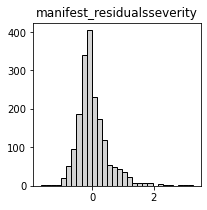

manifest_residualsPropZ5 kurtosis: 2.54
manifest_residualsPropZ5 skew: 0.82


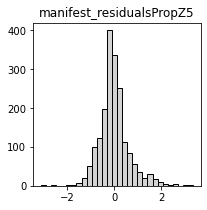

manifest_residualsseverity kurtosis: 4.78
manifest_residualsseverity skew: 1.51


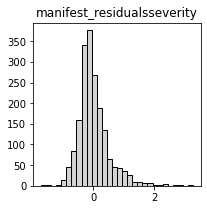

manifest_residualsunevenness kurtosis: 2.11
manifest_residualsunevenness skew: 0.83


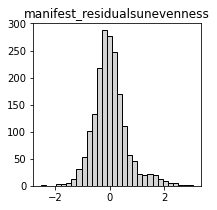

manifest_residualsseverity kurtosis: 4.64
manifest_residualsseverity skew: 1.48


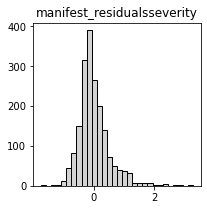

manifest_residualsVTDperhour kurtosis: 3.43
manifest_residualsVTDperhour skew: 0.73


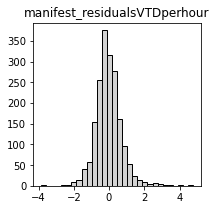

manifest_residualsseverity kurtosis: nan
manifest_residualsseverity skew: nan


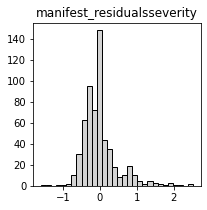

manifest_residualszonecrossed2transition kurtosis: nan
manifest_residualszonecrossed2transition skew: nan


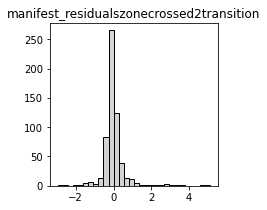

In [11]:
li_catcov = ['IsOFH','ExperimentID','Is_relocated']
for mvt_name, df_residuals in dico_mvt_dfres.items():
    li_res = ['manifest_residualsseverity','manifest_residuals'+mvt_name]
    li_contcov = ['time2event','MonthInstudy','severity','weight','ysmooth_severity_severity', 'ysmooth_'+mvt_name+'_'+mvt_name]+[mvt_name]+[i for i in df_residuals.columns if i.startswith('etaprior')]
    path_2save_ = os.path.join(path_2save,mvt_name)
    #create a director if not existing
    if not os.path.exists(path_2save_):
        os.makedirs(path_2save_)
    ################ distributions of manifest residuals ################
    #Skewness is a measure of the lack of symmetry. 
    #Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
    #"Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if skewness is between ‐2 to +2 and kurtosis 
    #is between ‐7 to +7.""
    for t in li_res:
        plt.figure(figsize=(3,3))
        li = df_residuals[t]
        plt.hist(li, color='lightgrey', edgecolor = "black", bins=30);
        plt.title(t)
        print(t+' kurtosis: %.2f'%kurtosis(li))
        print(t+' skew: %.2f'%skew(li))
        plt.savefig(os.path.join(path_2save_,'Res_'+t+'.jpg'),dpi=300,format='png',bbox_inches='tight')
        plt.show();
        plt.close()
    
    ################ for each categorical covariates ################
    c = len(li_catcov) ; l = len(li_res)
    img_w = 4 ; img_h = 4
    fig = plt.figure(figsize=(img_w*c, img_h*l))
    i = 1
    for t in li_res:
        for cov in li_catcov:
            plt.subplot(l,c,i)
            plt.tight_layout()
            sns.histplot(data=df_residuals, x=t, hue=cov, fill=True)
            plt.title(t)
            i = i+1
    plt.savefig(os.path.join(path_2save_,'Res_categoricalvar.jpg'),dpi=300,bbox_inches='tight')            
    plt.close()
    
    c = len(li_catcov) ; l = len(li_res)
    img_w = 3 ; img_h = 3
    fig = plt.figure(figsize=(img_w*c, img_h*l))
    i = 1
    for t in li_res:
        for cov in li_catcov:
            plt.subplot(l,c,i)
            plt.tight_layout()
            sns.violinplot(data=df_residuals, y=t, x=cov, color='lightgrey')
            plt.title(t)
            i = i+1
    plt.savefig(os.path.join(path_2save_, 'Res_categoricalvarviolinplot'+t+'.jpg'),dpi=300,bbox_inches='tight')            
    plt.close()
    
    ################ across continuous covariates ################
    for t in li_res:
        for cov in li_contcov:
            sns.scatterplot(x=cov, y=t, data=df_residuals, hue='ExperimentID', alpha=0.2);
            plt.axhline(y=0, color='red');
            n = mvt_name+'Res_catvar_'+t+'_'+cov+'.jpg'
            plt.savefig(os.path.join(path_2save_, n.replace('zonecrossed2transition','ZC2T')),dpi=300,bbox_inches='tight')
            #plt.show();
            plt.close()
    #VTD: more negative at the end, predicted higher KBF compared to real

    ################ individually ################
    for r in li_res:
        dico_hen_resmean = dict(df_residuals.groupby(['HenID'])[r].mean())
        df_residuals['sortby'] = df_residuals['HenID'].map(lambda x: dico_hen_resmean[x])
        plt.figure(figsize=(15,5))
        df_plt = df_residuals.sort_values('sortby').copy()
        sns.boxplot(data=df_plt, x='HenID',y=r, fliersize=0.1, linewidth=0.3);        
        plt.axhline(y=0, color='red');
        plt.savefig(os.path.join(path_2save_, 'Res_Individual_'+r+'.jpg'),dpi=300,bbox_inches='tight')
        #we see that for individuals with larger manifestKBF residuals that it is also more variable
        #individual heterogeneity of variance? for KBF not mvt
        plt.close()

In [12]:
print(li_contcov)
#TODO:: check 6 predicted latent process values 

['time2event', 'MonthInstudy', 'severity', 'weight', 'ysmooth_severity_severity', 'ysmooth_zonecrossed2transition_zonecrossed2transition', 'zonecrossed2transition', 'etaprior_BHV_BHV', 'etaprior_KBF_KBF', 'etaprior_cintBHV_cintBHV', 'etaprior_cintKBF_cintKBF', 'etaprior_dynBHV_dynBHV', 'etaprior_dynKBF_dynKBF']
